In [ ]:
# imports
import pandas as pd
import numpy as np
import os

In [ ]:
%matplotlib inline

In [ ]:
# read the data with all default parameters
train_df = pd.read_csv("train.csv", index_col='PassengerId')
test_df = pd.read_csv('test.csv', index_col='PassengerId')

In [ ]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [ ]:
df = pd.concat((train_df, test_df),axis=0, sort=True)

In [ ]:
# use .info() to detect missing values (if any)
df.head()

## Data Munging : Working with missing values

In [ ]:
# use .info() to detect missing values (if any)
df.info()

### Feature : Embarked

In [ ]:
# extract rows with Embarked as Null
df[df.Embarked.isnull() & df.Age.isnull()]

In [ ]:
df[df.Embarked.isnull()]

In [ ]:
# how many people embarked at different points
df.Embarked.value_counts()

In [ ]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

In [ ]:
df.loc[df.Embarked.isnull(), 'Embarked']
# impute the missing values with 'S'

In [ ]:
df[df.Embarked.isnull()]

In [ ]:
df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

## Different way of coming up with the missing values to fill in

In [ ]:
# read the data with all default parameters
train_df = pd.read_csv("train.csv", index_col='PassengerId')
test_df = pd.read_csv('test.csv', index_col='PassengerId')

test_df['Survived'] = -888 # Adding Survived with a default value
df = pd.concat((train_df, test_df),axis=0, sort=True)

In [ ]:
# Option 2 : explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

In [ ]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)

In [ ]:
# check if any null value remaining
df[df.Embarked.isnull()]

### Feature : Age

In [ ]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [ ]:
# return null rows
df[df.Age.isnull()]

#### option 1 : replace all missing age with mean value

In [ ]:
df.Age.plot(kind='hist', bins=20, color='c');

In [ ]:
# get mean
df.Age.mean()

issue : due to few high values of 70's and 80's pushing the overall mean



In [ ]:
# replace the missing values
# df.Age.fillna(df.Age.mean(), inplace=True)

#### option 2 : replace with median age of gender

In [ ]:
# median values
df.groupby('Sex').Age.median()

In [ ]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');

In [ ]:
# replace : 
age_sex_median = df.groupby('Sex').Age.transform('median')

In [ ]:
df.groupby('Sex').Age.transform('median')

In [ ]:
age_sex_median

In [ ]:
df.Age.fillna(age_sex_median, inplace=True)

In [ ]:
# return null rows
df[df.Age.isnull()]

## Working with outliers

### Age

In [ ]:
# use histogram to get understand the distribution
df.Age.plot(kind='hist', bins=20, color='c');

In [ ]:
df.loc[df.Age > 70]

### Fare

In [ ]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

In [ ]:
# box plot to indentify outliers 
df.Fare.plot(kind='box');

In [ ]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

In [ ]:
# binning
pd.qcut(df.Fare, 4)

In [ ]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

In [ ]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

In [ ]:
df.head()

## Feature Engineering

### Feature : Age State ( Adult or Child )

In [ ]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [ ]:
# AgeState Counts
df['AgeState'].value_counts()

In [ ]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

### Feature : FamilySize

In [ ]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

In [ ]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [ ]:
# further explore this family with max family members
df.loc[df.FamilySize == df.FamilySize.max()]

In [ ]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

### Feature : IsMother

In [ ]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) ), 1, 0)

In [ ]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother, normalize='columns')

### Categorical Feature Encoding

In [ ]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [ ]:
print (df.info())

### Advanced visualization using MatPlotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

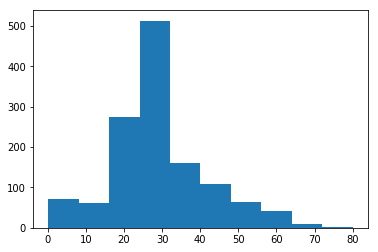

In [89]:
plt.hist(df.Age)

#df['Age'].plot(kind='hist')

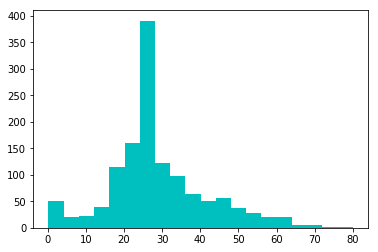

In [92]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

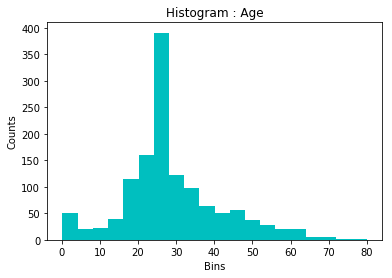

In [97]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

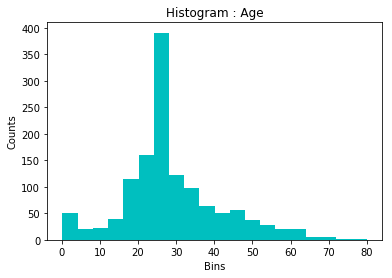

In [110]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

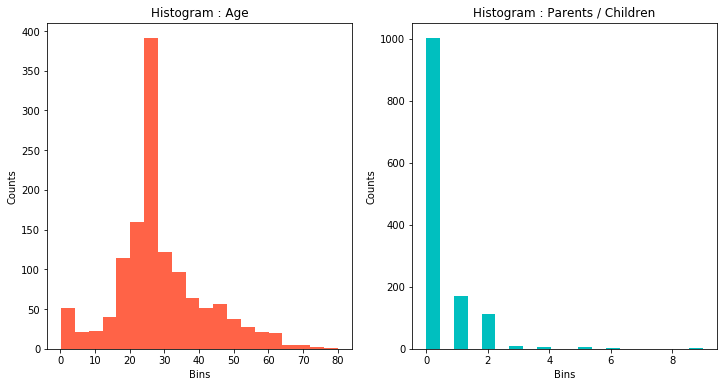

In [123]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.hist(df.Age, bins=20, color='tomato')
ax1.set_title('Histogram : Age')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Parch, bins=20, color='c')
ax2.set_title('Histogram : Parents / Children')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.savefig('test.png')